<a href="https://colab.research.google.com/github/Rahafhosari/DataScience2024-2025/blob/master/Data_Visualization_Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization Core [Starter Notebook]

- Student Name: Rahaf Hosari

## Import Packages and Load Data

In [3]:
# import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
## Save the filepath to the data as a variable "fpath"
fpath = '/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week04/Data/insurance_mod.csv'

In [5]:
# Read in the file and disply the info and head
df = pd.read_csv(fpath)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16885.0
1,18,male,33.770,1,0,southeast,1726.0
2,28,male,33.000,3,0,southeast,4449.0
3,33,male,22.705,0,0,northwest,21984.0
4,32,male,28.880,0,0,northwest,3867.0


## Explore Correlation

### 1\) Correlation Heatmap

1a) Define a variable containing the correlations between variables in the insurance dataset.

In [8]:
# Find correlations
corr = df.corr(numeric_only = True)
corr

,age,bmi,children,smoker,charges
age,1.000000,0.109272,0.042469,-0.025019,0.299009
bmi,0.109272,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.012759,1.000000,0.007673,0.067997
smoker,-0.025019,0.003750,0.007673,1.000000,0.787251
charges,0.299009,0.198341,0.067997,0.787251,1.000000


1b) Make a heatmap of the correlations and annote with the values.

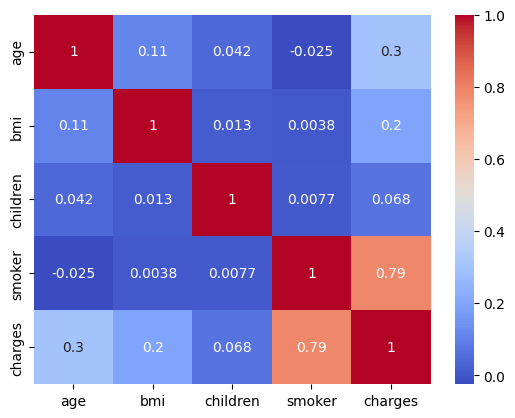

In [17]:
# Make a heatmap using the correlations from above
# fig, ax = plt.subplots(figsize=(10,10)) #Shows a bigger graph
fig, ax = plt.subplots()
sns.heatmap(corr, cmap = 'coolwarm', annot = True, ax=ax);

1c) **Are there arny strong correlations?
Is it a positive or negative correlation?**

- Your Answer:
  - `Smokers and Charges`


## Explore Charges vs. Smokers

### 2\) Barplot - Charges for Smokers vs. Non-Smokers

2a) Make a barplot to visualize the mean of charges for smokers and nonsmokers.

Text(0.5, 1.0, 'Charges for Smokers vs. Non-Smokers')

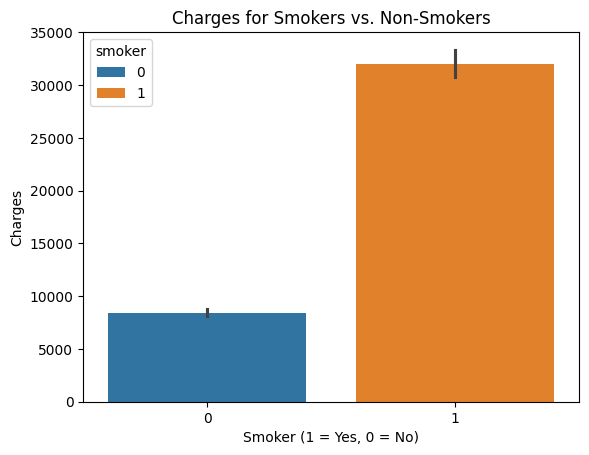

In [51]:
# Make a barplot of smoker vs charges
# df['smoker_mask'] = df['smoker'].map({'Smoker': 1, 'Non-Smoker': 0})
ax = sns.barplot(data=df, x='smoker', y="charges",hue="smoker")
plt.xlabel("Smoker (1 = Yes, 0 = No)")
plt.ylabel("Charges")
plt.title("Charges for Smokers vs. Non-Smokers")

2b) Is the mean of charges higher for smokers or nonsmokers? ((In a future course, you will explore how to calculate the statistical significance of this difference)

- Your Answer:
  -  `Yes`

Calculated :

In [37]:
mean_for_smokers = df[df['smoker']==1]['charges'].mean().round(2)
mean_for_non_smokers = df[df['smoker']==0]['charges'].mean().round(2)
print(f"Mean charges for smokers: {mean_for_smokers}")
print(f"Mean charges for non-smokers: {mean_for_non_smokers}")

Mean charges for smokers: 32050.23
Mean charges for non-smokers: 8434.26


### 3\) Boxplot - Charges for Smokers vs. Non-Smokers


3a) Create a boxplot with x as smokers and y as charges.


Text(0, 0.5, 'Charges')

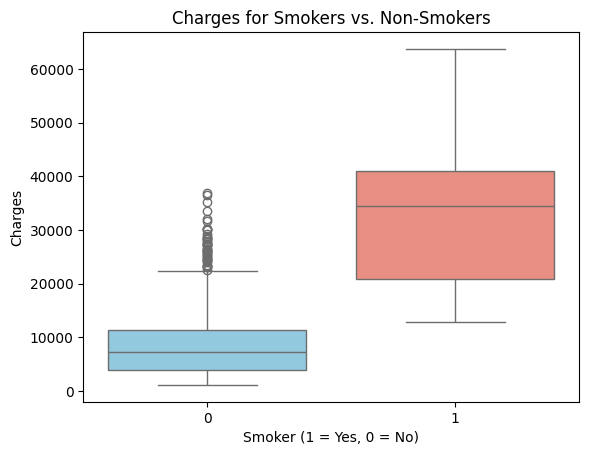

In [45]:
# Create a boxplot of smoker vs. charges
palette = {0: "skyblue", 1: "salmon"}

ax = sns.boxplot(data=df, x='smoker', y="charges",palette=palette,hue='smoker',legend=False)
ax.set_title("Charges for Smokers vs. Non-Smokers");
ax.set_xlabel("Smoker (1 = Yes, 0 = No)")
ax.set_ylabel("Charges")


3b) What information does this include that you could not see in your bar chart?
- Answer(s):
  - `That the mean for Smokers is higher that the mean of charges for Non-Smokers.`

## Explore Charges for Males vs. Females

### 4\) Barplot - Charges for Males vs. Females

4a) Make a searborn barplot to visualize the difference in charges between males and females.

Text(0.5, 1.0, 'Charges for Males vs. Females')

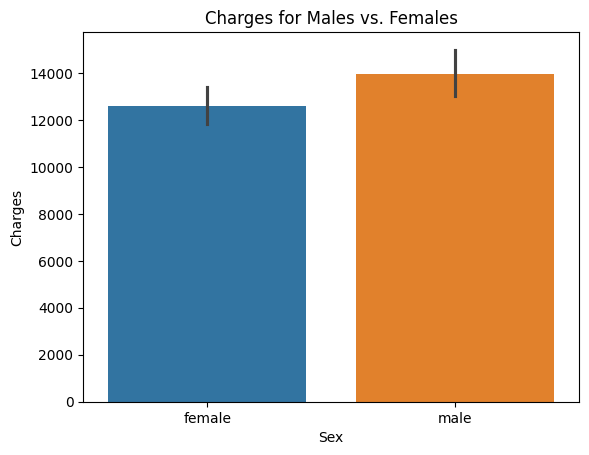

In [52]:
# Make a barplot of sex vs. charges
ax = sns.barplot(data=df, x='sex', y="charges",hue="sex")
ax.set_xlabel("Sex")
ax.set_ylabel("Charges")
ax.set_title("Charges for Males vs. Females")

4b)  Is the mean of charges higher for males or females?

- Your Answer:
  - `Charges Mean is higher for Males`

### 5\) Grouped Barplot - Charges by Sex and Smoker

5a\) Create a seaborn barplot to visualize the diference between insurance charges grouped by Smoker (on the x-axis), and Sex (the hue).

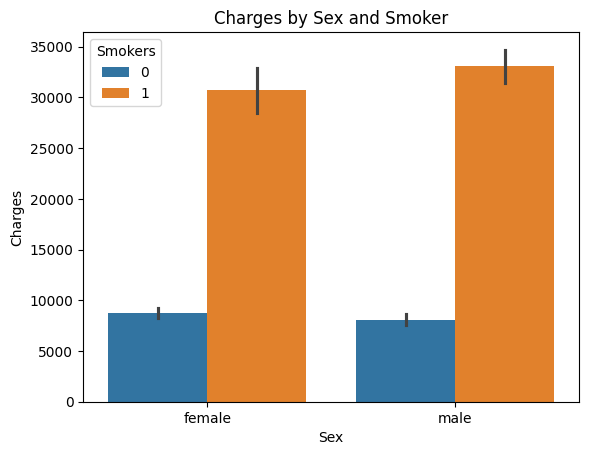

In [73]:
# Create a barplot of smoker vs charges, colored by sex
ax = sns.barplot(data=df, x="sex", y="charges", hue='smoker')
ax.set_title("Charges by Sex and Smoker")
ax.set_xlabel("Sex")
ax.set_ylabel("Charges")

# Customize Legend
legend = ax.legend(title= "Smokers")

# Grouped boxplot in seaborn
# ax = sns.boxplot(data=df, x='Sex,Smoker', y="Charges")
# ax.set_title("Comparing Sale Price for Homes with/without Central Air");

5b\) What do you observe? Which of the 4 groups has the highest average charges?
- Your Answer:
  - `Male Smokers`

## Explore Age vs. Charges

### 6\) Scatter Plot - Age vs. Charges

6a) Make a scatterplot to visualize the relationship between charges and age for the entire dataset

In [ ]:
# Create a scatter plot of age vs charges


6b) Desribe what you notice from the visualization.
- Your Answer:
  - `...`

### 7\)  Grouped Scatter Plot - Age vs. Charges, colored by Smoker

7a) Make a scatterplot to visualize the relationship between charges and age, but colored by smoker or not.

In [ ]:
# make another scatterplot of age vs charges, but colored by smoker
# (using seaborn will make this easy)


7b) Desribe what you notice from the visualization.

- Your Answer:
  - `...`

### 8\) Grouped Scatter Plot - Age vs. Charges, colored by Sex

8a) Make a scatterplot to visualize the relationship between charges and age, but colored by sex.

In [ ]:
# make another scatterplot of charges vs age, but this time color the dots by sex


8b) Describe what you notice from the visualization

- Your Answer:
  - `...`

## Explore BMI

### 9\) Regplot - Charges vs. BMI

9a) Make a seaborn regplot to visualize the relationship between charges and bmi for the entire dataset

In [ ]:
# Make a seaborn regplot for bmi vs. charges.


9b\) What do you notice from the visualization? *(There are many correct answers.)*

- Your Answer:
  - `...`

### 10\) Scatterplot - Charges vs. BMI - Colored by Smoker

10a) Make a scatterplot to visualize the relationship between charges and bmi colored by smoker or not

In [ ]:
# Make a scatterplot of bmi vs charges, colored by smoker


10b) What do you notice from the visualization? (There are many correct answers.)

- Your Answer:
  - `...`

### 11\)  Linear Model Plot - Charges vs. BMI - Colored by Smoker



11a) Compare the relationship of bmi and charges for smokers and nonsmokers using seaborn's `lmplot` to calculate a separate trendline for Smokers vs. Non-Smokers.


In [ ]:
# Create an lmplot of bmi vs. charges, colored by smoker.


11b) What do you notice from the visualization? (Compare the trendlines.)

- Your Answer:
  - `...`

## Explore Regions

### 12\) Countplot for Regions

12a) Make a countplot to show how many customers per region.

In [ ]:
# Make a countplot for region


12b) Which region appears the most in this data set?

- Your Answer:
  - `...`

### 13\) Barplot of Charges by Region

13a) Make a barplot to show average charges by region.

In [ ]:
# make a barplot of charges by region


13b) Which region has the highest average charges?

- Your Answer:
  - `...`

### 14\) Bar Chart of Ratios (%) of Smokers in Each Region

14a) Calculate the ratio of smokers in each region and save it as a variable called "percent_smoker_by_region". (Hint: use .groupby with "region" combined with slicing the "smoker" column and end with .mean() )

In [ ]:
# use groupby to get the mean of smoker grouped by region


14b) Plot the ratios of smokers by region as a bar plot.



In [ ]:
# Plot the ratios (the results of then groupby above)


14c) Which region has the highest ratio of smokers?

- Your Answer:
  - `...`

> You've completed the assignment! Download your notebook and upload it as your submission.